[Visualizing COVID-19 Data Beautifully in Python (in 5 Minutes or Less!!)](https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a)
By Nik Piepenbreier

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [4]:
# load and select data of certain countries
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

In [5]:
# create summary column aggregating total cases by type
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [6]:
# restructure data
# by pivoting df so each country is a column with cases as data fields
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
# index of df is date
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
# country names are column headers
covid.columns = countries

In [8]:
covid

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,2,0,2,0
2020-01-25,0,1487,3,0,2,0
2020-01-26,1,2180,3,0,5,0
...,...,...,...,...,...,...
2020-04-13,34216,164597,168381,197566,647629,101221
2020-04-14,36143,164851,176207,202853,681264,107297
2020-04-15,38180,165013,183240,211157,716771,112745


In [9]:
# calculate rates per 100,000
# store country populations in a dict
populations = {'Canada':37664517, 'Germany':83721496,'United Kingdom':67802690, 'US': 330548815, 'France': 65239883, 'China':1438027228}
# new df with same data but cases per capita
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

In [10]:
percapita

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0.000000,0.041237,0.000000,0.000000,0.000303,0.000000
2020-01-23,0.000000,0.048052,0.000000,0.000000,0.000303,0.000000
2020-01-24,0.000000,0.068288,0.003066,0.000000,0.000605,0.000000
2020-01-25,0.000000,0.103406,0.004598,0.000000,0.000605,0.000000
2020-01-26,0.002655,0.151597,0.004598,0.000000,0.001513,0.000000
...,...,...,...,...,...,...
2020-04-13,90.844123,11.446028,258.095190,235.980016,195.925373,149.287587
2020-04-14,95.960344,11.463691,270.090920,242.295002,206.100875,158.248884
2020-04-15,101.368617,11.474957,280.871135,252.213601,216.842707,166.283963


Text(2020-01-23 00:00:00, -250000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

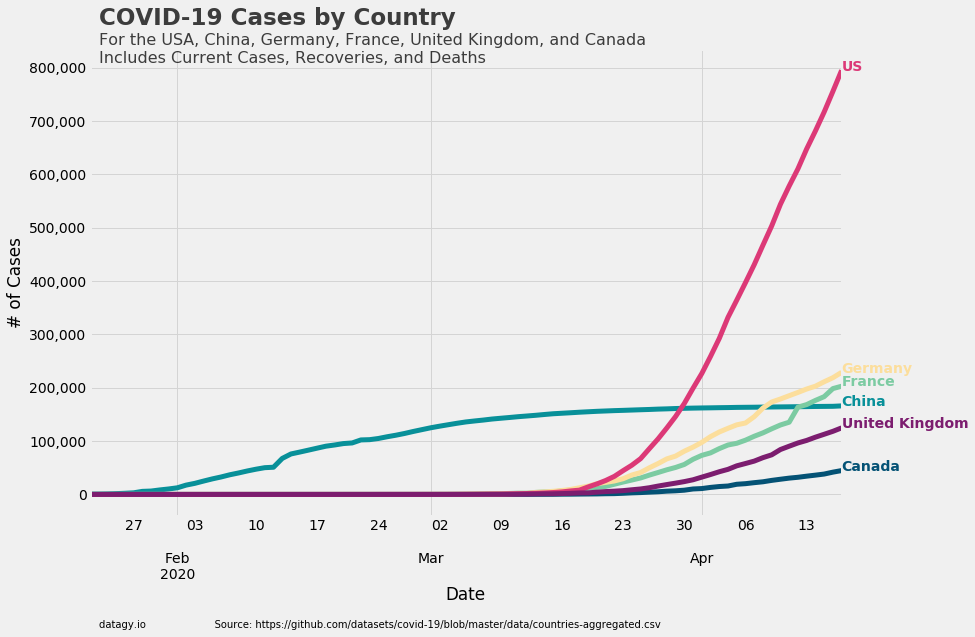

In [18]:
# visualize cases over time

# generate colors and style 
# dict for colors per country
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# create visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # format values to separate thousands
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# generates label text for countires to the right of the last x-value at current day's y-value
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')
    
# add labels for title, subtitle and source information
plot.text(x = covid.index[1], y = int(covid.max().max())+85000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -250000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

Text(2020-01-23 00:00:00, -90, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

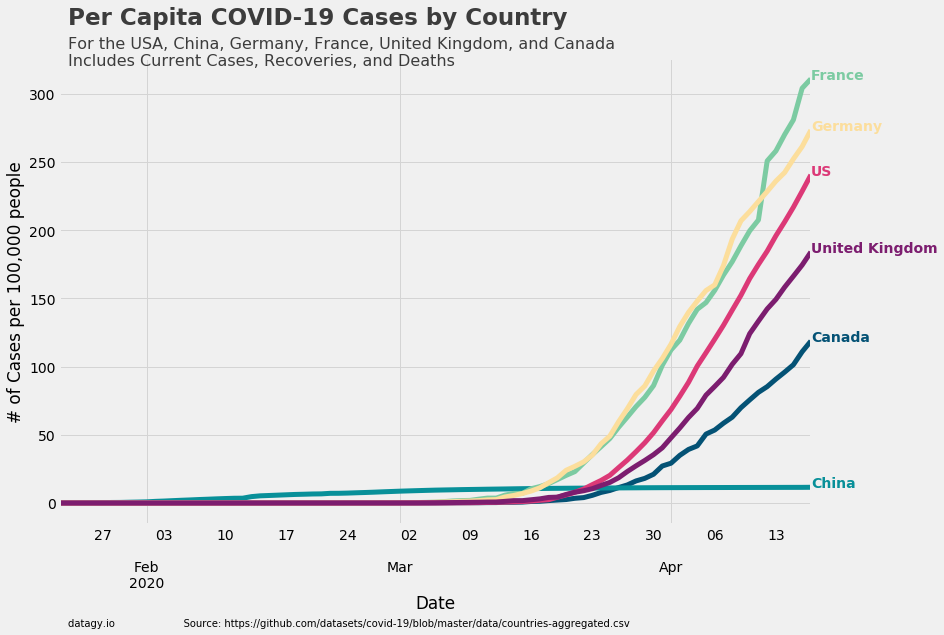

In [22]:
# visualize cases per capita

percapitaplot = percapita.plot(figsize = (12,8), color = list(colors.values()), linewidth = 5, legend = False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 people')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+40, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -90,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)